# <p style="color:blue;text-align:center;font-size:32px"> Convolutional Neural Network (CNN)</p>

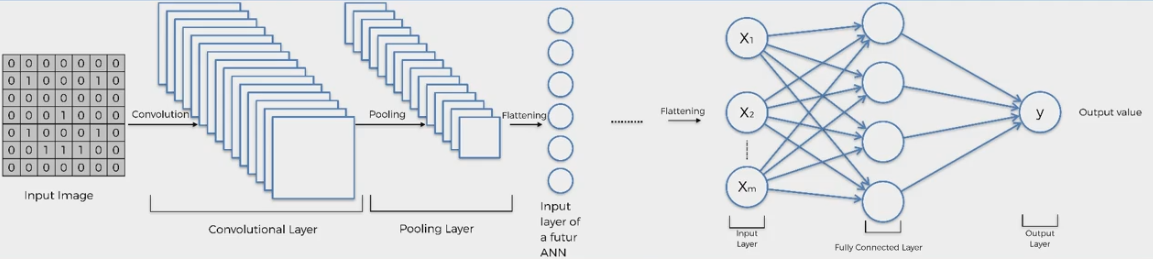

In [60]:
from IPython.display import Image
Image(filename="./conn.png")

In [50]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

## <font color="purple">1.Adım : CNN'i baslatma </font>
#### [Squential Model](https://keras.io/getting-started/sequential-model-guide/)

In [51]:
clf = Sequential()

## <font color="purple">2.Adım :Convolution & Relu</font>

In [52]:
''' 
  filter: filtre sayısı:32
          row:3
          column:3
          3X3' luk 32 tane filtre matrix'i  yaratıyoruz.
          
  input_shape:  (rows, cols, channels)
                row: 64 (Resimden daha fazla özellik çıkarmak istiyorsak bu değer 128 yada  256' da alınabir.
                         Fakat işlem çok uzun süreceği için GPU üzerinde çalışmalısınız.)
                cols: 64 
                channels: 3 (Inputlarımız renkli.*RGB)
                Thensorflow backend kullandığmız için bu sıra (row,cols,channels)
                Eğer Theano kullanıyorsak (channels,row,cols) şeklinde olmalı.
  activation: ReLU 
'''
clf.add(Conv2D(32, (3, 3), input_shape = (64,64,3), activation = 'relu'))

## <font color="purple">3.Adım :Max Pooling</font>

In [53]:
clf.add(MaxPooling2D(pool_size=(2,2)))

## <font color="purple"> 2.Convolution Layer</font>

In [54]:
# Model performansını artırmak icin 2. convolution layer' ı ekliyoruz.
clf.add(Conv2D(64, (3,3), activation = 'relu'))
clf.add(MaxPooling2D(pool_size = (2, 2)))

## <font color="purple">4.Adım :Flattening</font>


Convolution ve pooling uygulandıktan sonra oluşan feature map' ler buyuk bir vektorde toplanır ve Fully Connected layer'ın input'u olur.

In [55]:
clf.add(Flatten())

## <font color="purple">5.Adım :Full Connection</font>

In [56]:
'''
    units: input sayısı ve outpu arasında bir sayı tercih edilir.
           Hesaplama için herhangi bir formulu yoktur. Input sayımız
           fazla olduğundan 128'i seçtik.
'''
clf.add(Dense(units = 128, activation = 'relu'))

## <font color="purple">6.Adım :Output Layer</font>

In [47]:
clf.add(Dense(units = 1, activation="sigmoid"))

## <font color="purple">7.Adım :Compile</font>

In [48]:
'''
   Optimizer: Stochastic Gradient Descent -> adam
   
   loss: Birden fazla sonucumuz olduğunda categorical_crossentropy' olmalı.
         Burada ya kedi ya da köpek olacağından binary_crossentropy seçildi.

   metrics: accuracy
   
'''
clf.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

## <font color="purple"> CNN ile Eğitim </font>

#### Image Augmentation (Resim Çoğaltma)

Elimizdeki veri seti boyutu az olduğunda overfitting'i azaltmak için resmin birçok çeşidini oluşturur. Her bir resmi, sağa sola döndürme, kaydırma gibi birçok farklı görünümünü oluştururuz. Böylece modelimizin ezberleme olasılığını düşürürüz.<br>
[Keras Image Data Generator](https://keras.io/preprocessing/image/#imagedatagenerator)

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [12]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [13]:

train_generator = train_datagen.flow_from_directory('dataset/training_set',
                                                    target_size = (64,64),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [14]:
test_generator = test_datagen.flow_from_directory('dataset/test_set',
                                                  target_size = (64,64),
                                                  batch_size = 32,
                                                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:
'''
steps_per_epoch: Eğitim setindeki input sayısı
validation_data: Test setimiz
validation_steps:Test setimizdeki input sayısı
'''
clf.fit_generator(train_generator,
                  steps_per_epoch = 8000,
                  epochs = 50,
                  validation_data = test_set,
                  validation_steps = 2000)

In [ ]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = clf.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [ ]:
clf.save("./")